Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Lastly, hit **Validate**.

If you worked locally, and then uploaded your work to the hub, make sure to follow these steps:
- open your uploaded notebook **on the hub**
- hit the validate button right above this cell, from inside the notebook

These  steps should solve any issue related to submitting the notebook on the hub.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [5]:
NAME = ""
COLLABORATORS = ""

---

# Lab 10: Feature Engineering & Cross-Validation
** This assignment is due 04/04/2018 at 11:59pm (graded on accuracy) **

In this lab, you will practice using scikit-learn to do feature engineering and cross-validation to produce a model with low error on held-out data.

In [6]:
# Run this cell to set up your notebook
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.set_context("talk")

from IPython.display import display, Latex, Markdown

### Introduction

For this lab, we will use a toy dataset to predict the house prices in Boston with data provided by the `sklearn.datasets` package.

Run the following cell to load the data. This will return a dictionary object which includes keys for:
    - `data` : the covariates (X)
    - `target` : the response vector (Y)
    - `feature_names`: the column names
    - `DESCR` : a full description of the data

In [7]:
from sklearn.datasets import load_boston

boston_data = load_boston()
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [8]:
print(boston_data['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

A look at the `DESCR` attribute tells us the data contains these features:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 USD
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of black 
                 residents by town
    13. LSTAT    % lower status of the population
    
Let's now convert this data into a pandas DataFrame. 

In [12]:
boston = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Question 1

Let's model this housing price data! Before we can do this, however, we need to split the data into training and test sets. The latter, held-out points will be used to choose the best performing model. Remember that the response vector (housing prices) lives in the `target` attribute.

Use the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split out 10% of the data for test. Call the resulting splits `X_train`, `X_test`, `Y_train`, `Y_test`.

In [23]:
from sklearn.model_selection import train_test_split
np.random.seed(47)

X = boston
Y = pd.Series(boston_data['target'])

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(455, 13)
(51, 13)
(455,)
(51,)


In [26]:
assert X_train.shape == (455, 13)
assert X_test.shape == (51, 13)
assert Y_train.shape == (455, )
assert Y_test.shape == (51, )

### Question 2

As a warmup, fit a linear model to describe the relationship between the housing price and all available covariates. We've imported `sklearn.linear_model` as lm, so you can use that instead of typing out the whole module name. Running the cell should create a scatter plot for our predictions vs the true prices.

In [27]:
import sklearn.linear_model as lm

linear_model = lm.LinearRegression()

linear_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,1,'Prices vs Predicted prices')

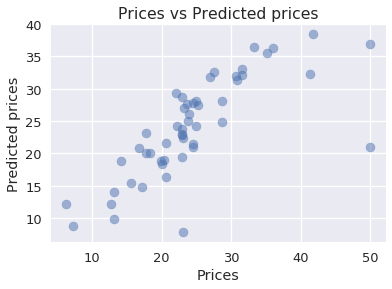

In [28]:

# Predict housing prices on the test set
Y_pred = linear_model.predict(X_test)

# Plot predicted vs true prices
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

### Question 3

As we find from the scatter plot, our model is not perfect. If it were perfect, we would see the identity line (i.e. a line of slope 1). Compute the root mean squared error (RMSE) of the predicted responses: 

$$
\textbf{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2 }
$$

Fill out the function below and compute the RMSE for our predictions on both the training data `X_train` and the test set `X_test`.  Note your implementation should not contain the word **"for"** (...that would be very slow).

In [29]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
        
    Returns:
        The root mean square error between the prediction and the groudtruth
    """
    return np.sqrt(np.mean((actual_y - predicted_y) ** 2))

In [30]:
train_error = rmse(Y_train, linear_model.predict(X_train)) 
test_error = rmse(Y_pred, Y_test)

print("Training RMSE:", train_error)
print("Test RMSE:", test_error)

Training RMSE: 4.5629122568949025
Test RMSE: 5.884928616875511


In [31]:
assert np.allclose((train_error, test_error), (4.56291225689, 5.88492861688))

## Cross Validation

**Warning**: don't use the test set to perform the feature selection! It may lead to over-fitting. We want to avoid using the test set too frequently. When selecting features or choosing hyper-parameters, we can split the training set further into train and validation sets. Then we can use the validation error to help select hyper-parameters.

Try $k$-fold cross-validation to select the best subset of features for our model. Recall the approach looks something like:

<img src="cv.png" width=500px>

### Question 4

Scikit-learn has built-in support for cross validation.  However, to better understand how cross validation works complete the following function which cross validates a given model.

1. Use the [`KFold.split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) function to get 4 splits on the training data. Note that `split` returns the indices of the data for that split.
2. For each split, select out the rows and columns based on the split indices and features.
3. Compute the RMSE on the validation split.
4. Return the average error across all cross validation splits.


In [36]:
from sklearn.model_selection import KFold

def compute_CV_error(model, X_train, Y_train):
    '''
    Split the training data into 4 subsets.
    For each subset, 
        fit a model holding out that subset
        compute the MSE on that subset (the validation set)
    You should be fitting 4 models total.
    Return the average MSE of these 4 folds.

    Args:
        model: an sklearn model with fit and predict functions 
        X_train (data_frame): Training data
        Y_train (data_frame): Label 

    Return:
        the average validation MSE for the 4 splits.
    '''
    kf = KFold(n_splits=4)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

        # Fit the model on the training split
        linear_model = model
        linear_model.fit(split_X_train, split_Y_train)
        
        # Compute the RMSE on the validation split
        error = rmse(split_Y_valid, linear_model.predict(split_X_valid))
        
        validation_errors.append(error)
        
    return np.mean(validation_errors)

In [37]:
assert np.isclose(
    compute_CV_error(lm.LinearRegression(), X_train[['TAX', 'INDUS', 'CRIM']],Y_train),
    7.5974094557701459)

### Question 5

Use the above cross validation function to determine which of the following feature sets to use:

In [41]:
feature_sets = [
    ['TAX', 'INDUS', 'CRIM'], 
    ['RM', 'LSTAT', 'PTRATIO'], 
    ['RM', 'B', 'NOX'], 
    ['TAX', 'LSTAT', 'DIS']
]

errors = []
for feat in feature_sets:
    print("Trying features:", feat)
    model = lm.LinearRegression()
    error = compute_CV_error(model,X_train.loc[:,feat] ,Y_train)
    print("\tRMSE:", error)
    errors.append(error)

best_err_idx = errors.index(np.min(errors))
best_err = np.min(errors)
best_feature_set = feature_sets[best_err_idx] 

for i in range(4):
    print('{}, error: {}'.format(feature_sets[i], errors[i]))

best_feature_set, best_err

Trying features: ['TAX', 'INDUS', 'CRIM']
	RMSE: 7.597409455770146
Trying features: ['RM', 'LSTAT', 'PTRATIO']
	RMSE: 5.221575997721902
Trying features: ['RM', 'B', 'NOX']
	RMSE: 5.803276796238311
Trying features: ['TAX', 'LSTAT', 'DIS']
	RMSE: 6.150288547992476
['TAX', 'INDUS', 'CRIM'], error: 7.597409455770146
['RM', 'LSTAT', 'PTRATIO'], error: 5.221575997721902
['RM', 'B', 'NOX'], error: 5.803276796238311
['TAX', 'LSTAT', 'DIS'], error: 6.150288547992476


(['RM', 'LSTAT', 'PTRATIO'], 5.221575997721902)

In [40]:
assert best_feature_set == ['RM', 'LSTAT', 'PTRATIO']
assert np.isclose(best_err, 5.221575997721903)

### Question 6
Finally, fit a linear classifier using your best feature set and predict housing prices for your original test set. Compute the final MSE.

In [45]:
# Fit your classifier
X_train = X_train.loc[:,best_feature_set]
X_test = X_test.loc[:,best_feature_set]
linear_model = lm.LinearRegression()
linear_model.fit(X_train, Y_train)
Y_predict = linear_model.predict(X_test)


# Predict points from our test set and calculate the mse
train_rmse = rmse(linear_model.predict(X_train), Y_train)
test_rmse = rmse(Y_predict, Y_test)



print("Train RMSE", train_rmse)
print("KFold Validation RMSE", best_err)
print("Test RMSE", test_rmse)

Train RMSE 5.145323898909589
KFold Validation RMSE 5.221575997721902
Test RMSE 5.846401452163671


Notice that the test error is higher than the validation error which is higher than the training error.  Why is this the case?

In [46]:
assert np.abs(test_rmse - 5.846401452163672) < 1e-3

Nice! You've used $k$-fold cross-validation to fit a linear regression model to the housing data.

In the future, you'd probably want to use something like [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) to automatically perform cross-validation, but it's instructive to do it yourself at least once.

SyntaxError: invalid syntax (<ipython-input-64-43cf8d587b6e>, line 1)

In [68]:
import csv
import numpy as np
import pandas as pd
dfs = pd.read_excel("data2.xlsx", sheet_name=None)
data = pd.DataFrame(dfs["Sheet1"])
temp = data.loc[:,["day", "height", "direction"]]
temp2 = temp.groupby("day").mean()
temp2.columns = ["hegith_mean", "direction_mean"]
data = data.merge(temp2, left_on="day", right_on="day")
temp2 = temp.groupby("day").var()
temp2.columns = ["height_var", "direction_var"]
data = data.merge(temp2,left_on = "day", right_on="day")
data.to_excel("result.xlsx")

In [67]:
data[data["day"] == 1]["height_x"].var()

715.8932328637491

/home/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,year,month,day,hour,minute,height_x,direction_x,hegith_mean,direction_mean,height_y,direction_y
0,2014,8,1,5,0,-8.740606,62.880779,37.289511,180.233427,715.893233,7684.198227
1,2014,8,1,5,10,-6.812989,64.283144,37.289511,180.233427,715.893233,7684.198227
2,2014,8,1,5,20,-4.840056,65.647840,37.289511,180.233427,715.893233,7684.198227
3,2014,8,1,5,30,-2.335707,66.978006,37.289511,180.233427,715.893233,7684.198227
4,2014,8,1,5,40,-0.271338,68.276689,37.289511,180.233427,715.893233,7684.198227
5,2014,8,1,5,50,1.459307,69.546850,37.289511,180.233427,715.893233,7684.198227
6,2014,8,1,5,60,3.353921,70.791377,37.289511,180.233427,715.893233,7684.198227
7,2014,8,1,6,0,3.353921,70.791377,37.289511,180.233427,715.893233,7684.198227
8,2014,8,1,6,10,5.329383,72.013098,37.289511,180.233427,715.893233,7684.198227
9,2014,8,1,6,20,7.346511,73.214796,37.289511,180.233427,715.893233,7684.198227


## Submission

Congrats! You are finished with this assignment. Please don't forget to submit by 11:59 pm!